##### 데싸노트의 실전에서 통하는 머신러닝 (골든레빗 MUST HAVE 시리즈)
- 결정 트리 (Decision Tree)
- 예측력 : 모델 학습을 통해 얼마나 잘 예측하는가
- 설명력 : 학습된 모델을 얼마나 쉽게 해석할 수 있나
- 보통 예측력과 설명력은 반비례 관계
- 어느 쪽이 더 높아야 하는지는 찾고자 하는 데이터에 따라 다르겠지요
- 암 환자 찾으려면 설명력이 높은 게 좋을 거고, 사기 거래가 의심되는 걸 찾으려면 예측력이 높은 게 좋겠죠

##### 그래서 오늘은 결정트리인데
- 데이터에 대한 가정이 없음 (선형이든 뭐든)
- 아웃라이어에 대한 영향을 받지 않고, 트리 그래프를 통해 직관적으로 이해 가능
- 대신 트리가 적당히 뻗어나가야지 과하게 뻗어나가는 경우 오버피팅 문제가 있음
- 트리들 중에 예측력이 가장 떨어짐

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace = True)

# skipinitialspace = 데이터 첫 자리 공란을 자동으로 제거 (의도치 않게 들어갔을 수도 있는 스페이스바를 없애준다고 보면 됨)

In [25]:
# 오늘의 문제 : 내 연봉은 과연 적절한가?

data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


- workclass : 고용 형태, marital-status : 혼인 상태, occupation : 직업, relationship : 가족관계, capital-gain / loss : 자산 증가, 감소
- hours-per-week : 주당 노동 시간 ,native-country : 본국, class : 연봉 구분
- 당연히 target은 class

In [26]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
# 불행 중 다행으로 class는 단순하니 데이터프레임 정보를 보도록 합시다

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [28]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [29]:
# 음.. 나는 object 타입도 다 보고 싶은데

data.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- object 타입인 애들은 당연히 mean이나 min, max 같은 숫자 데이터가 없으니 NaN이 뜸
- 대신 unique, top, freq가 보일 것임 : 각각 고유 value 개수, 최다 빈도 value, freq는 top이 총 몇 번 나왔나를 보여줌

In [30]:
# class를 50K 넘으면 1로, 아니면 0으로 바꿔줍시다
data['class'] = data['class'].map({'<=50K':0, '>50K':1})

In [31]:
# 그러고보니 이번 데이터프레임 자료형이 어떻게 되었죠

for i in data.columns:
    print(i, data[i].dtype)

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [32]:
# 으음... object 끼리 따로 빼볼까요
obj_list = []
for i in data.columns:
    if data[i].dtype == 'object':
        obj_list.append(i)

In [33]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [34]:
# object 컬럼들 중에 고윳값이 얼마나 되나 봅시다

for i in obj_list:
    print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


- 아니 고유값이 적당히 많아야지 : education, occupation, native-country는 전처리를 좀 더 합시다

In [35]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [36]:
# 데이터를 가만히 보니 education-num이 education 컬럼을 서열화시킨 거 같은데?

for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [37]:
# 다행이도 학력은 education-num도 있고 저렇게 서열로 쫙 구분도 잘 되어있고 하니 그냥 결측치 drop으로 마무리합시다

data.drop('education', axis=1, inplace=True)

In [38]:
# occupation 확인

data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

- 직업군들이 어느 정도는 정리되어 있는 거로 보임
- 얘네들끼리 서열로 다시 정리하는 것도 웃기고
- 나중에 그냥 더미로 만들어버립시다 (14개 정도는 괜찮아)

In [39]:
# native-country : 이게 문제임

data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

- 당연하겠지만 미국 데이터라 미국 출신이 절대적으로 많은 건 당연함
- 그냥 단순히 {미국 : 나머지} 이렇게 분류하면 우리야 편한데 정보가 많이 누락되지 (아시아, 유럽 이런 거도 다 뭉개버릴 거니까)
- 일단 나라를 그룹화해서 묶어봅시다

In [40]:
data.groupby('native-country').mean().sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


- 글쎄요.. 이게 무슨 의미가 보이나요
- 미국 class 평균이 0.24라서 쟤를 기준으로 나머지로 뭉뚱그리자니 다른 애들 class가 미국이랑 비슷하거나 높은 데도 많아서 아닌 거 같고
- 그렇다고 유럽같이 대륙별로 묵짜고 하니 대륙 국가별로도 데이터 차이가 심한 편임
- 남은 건 더미로 만들어버리는 건데... 이게 일반적인 방법이라면 정말 미친 짓이었겠지만
- 오늘은 결정 트리입니다. 저 국가들을 숫자로 라벨링을 해줍시다. (트리가 충분히 깊어진다면 쟤네들도 다 쪼개질 거 아니야)

In [41]:
country_group = data.groupby('native-country').mean()['class']

In [42]:
country_group = country_group.reset_index()
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [43]:
# 이제 위에 있는 이걸 data와 합체

data = data.merge(country_group, on='native-country', how='left')

In [44]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


- 역시 merge는 저게 문제지. class가 2개가 되어버렸어!!
- class_y를 국가명 대신 사용할 것이기 때문에 native-country를 버리고 class_y의 컬럼명을 native-country로 바꿉시다
- 당연히 class_x도 class로 바꿔야겠지요

In [45]:
data.drop('native-country', axis=1, inplace=True)
data = data.rename(columns={'class_x':'class', 'class_y':'native-country'})

In [46]:
# 다시 봅시다 결측치

data.isna().mean()

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

In [47]:
# 저걸 평균이나 최대빈도값으로 채워주거나
# 아니면 통상 -9, -99같은 숫자를 임의로 쓰기도 하는데
# 이게 선형 모델이었으면 결측치 잘못 채웠을 때 데이터가 왜곡될 수도 있으므로 조심해야겠지만
# 다행이도 결정 트리에서는 별다른 문제가 되지 않음
# 오늘은 임의의 숫자를 채워봅시다

data['native-country'] = data['native-country'].fillna(-99)

In [49]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [50]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [51]:
# 근데 workclass랑 occupation은 숫자도 아니라서 결측치 어떻게 채워요
# workclass 같은 경우 Private가 압도적이니 그거로 결측치를 채우면 상관없겠지만 (실제로는 70% 수준이라 이거도 조심스럽긴한데 아무튼)
# occupation은 데이터가 골고루 나와서 최대 빈도로 채우면 안 되고 '-99'같이 'Unknown'으로 채워야겠네요

data['workclass'] = data['workclass'].fillna('Private')
data['occupation'] = data['occupation'].fillna('Unknown')

In [52]:
# 더미 변수 나와라요
data = pd.get_dummies(data, drop_first=True)

In [53]:
data

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,38,9,0,0,50,0,0.243977,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,28,12,0,0,40,1,0.243977,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,44,10,7688,0,40,1,0.243977,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,10,0,0,30,0,0.243977,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0.243977,0,0,1,...,0,0,0,0,1,0,0,0,1,0
48838,40,9,0,0,40,1,0.243977,0,0,1,...,0,0,0,0,0,0,0,0,1,1
48839,58,9,0,0,40,0,0.243977,0,0,1,...,0,0,0,1,0,0,0,0,1,0
48840,22,9,0,0,20,0,0.243977,0,0,1,...,0,0,1,0,0,0,0,0,1,1


In [54]:
# 이제 데이터셋 / 시험셋 구분
# 위에 보면 알겠지만 데이터가 충분히 크기 때문에 test_size를 넉넉하게 잡아도 됨
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.4, random_state=100)

In [56]:
# 결정트리 모델 만들고
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [57]:
# 정확도 확인... 나쁘지 않네
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8146081793519988

In [58]:
# 하지만 우린 정확도를 더 높일 것이다

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train) # 훈련 셋
test_pred = model.predict(X_test) # 테스트 셋

print(f'Train Score : {accuracy_score(y_train, train_pred)}, Test Score : {accuracy_score(y_test, test_pred)}')

Train Score : 0.9780242279474493, Test Score : 0.8150688437324052


In [59]:
# 저 정도면 훈련할 때 오버피팅이 일어난 거 같은데
# max_depth 옵션을 주도록 합시다. 가지가 적당히 뻗어나가도록 = 오버피팅 방지

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train) # 훈련 셋
test_pred = model.predict(X_test) # 테스트 셋

print(f'Train Score : {accuracy_score(y_train, train_pred)}, Test Score : {accuracy_score(y_test, test_pred)}')

Train Score : 0.8540180856509129, Test Score : 0.8499769667809797


In [60]:
# 확실히 좋아졌네.. 7로 해볼까

model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train) # 훈련 셋
test_pred = model.predict(X_test) # 테스트 셋

print(f'Train Score : {accuracy_score(y_train, train_pred)}, Test Score : {accuracy_score(y_test, test_pred)}')

Train Score : 0.8598532673605187, Test Score : 0.8543788708604186


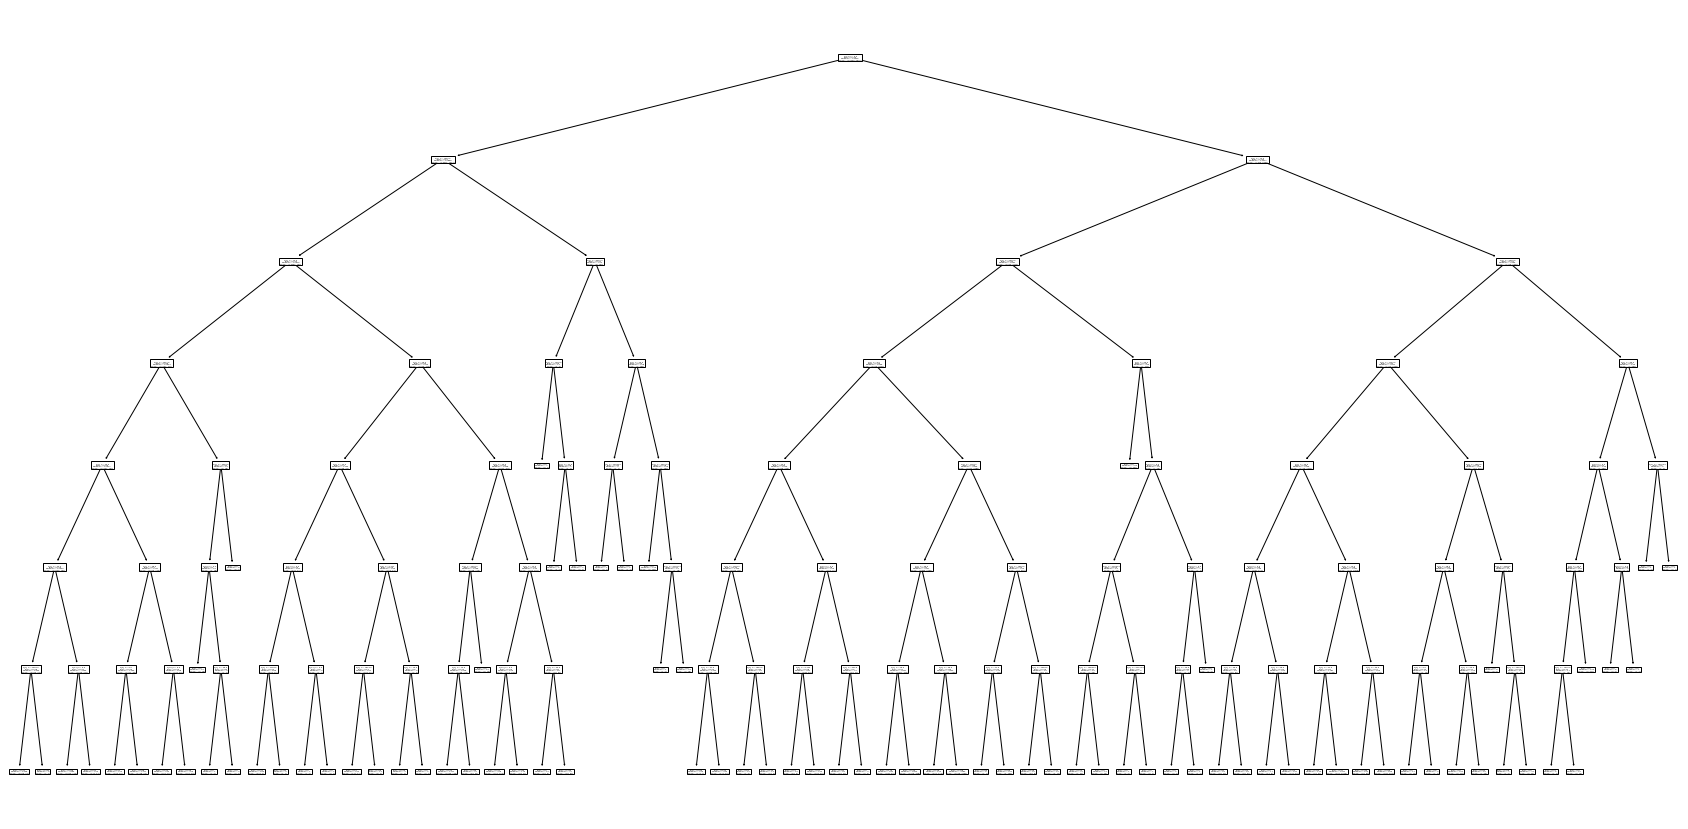

In [61]:
# 트리 그리기

from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(model) # 현재 마지막으로 작업한 max_depth=7 모델임
plt.show()

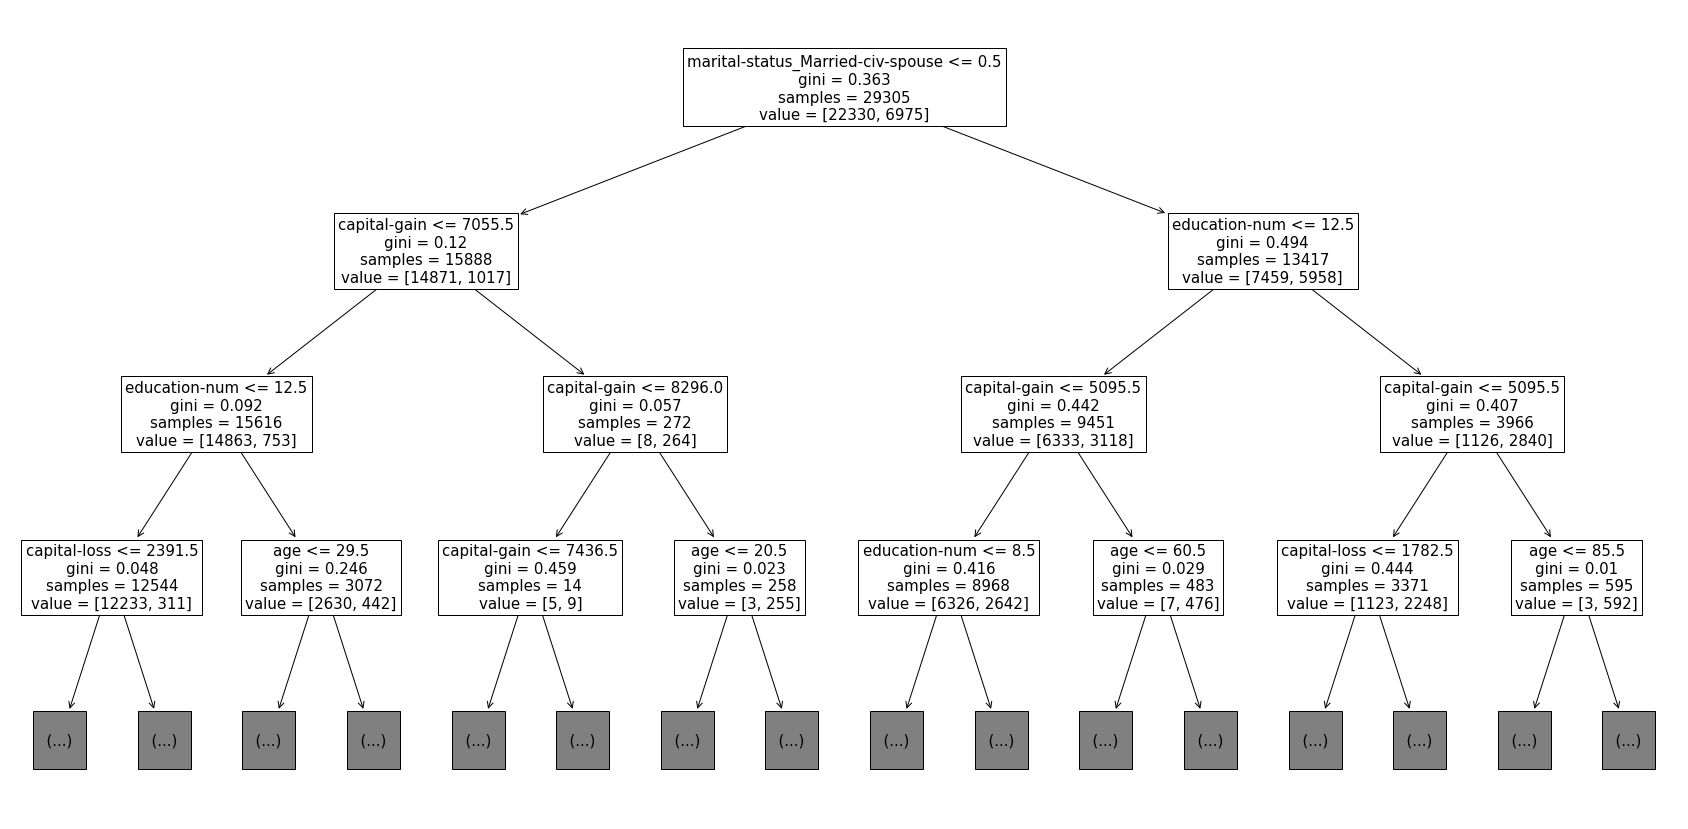

In [63]:
# 그래도 가지가 너무 많은데 좀 줄여볼까

plt.figure(figsize=(30,15))
plot_tree(model, max_depth=3, fontsize=15, feature_names=X_train.columns) # 현재 마지막으로 작업한 max_depth=7 모델 중 3번 가지치기한 거만 보여줘
plt.show()

#### 더 나아가기
- 타이타닉을 결정 트리로 해본다면?